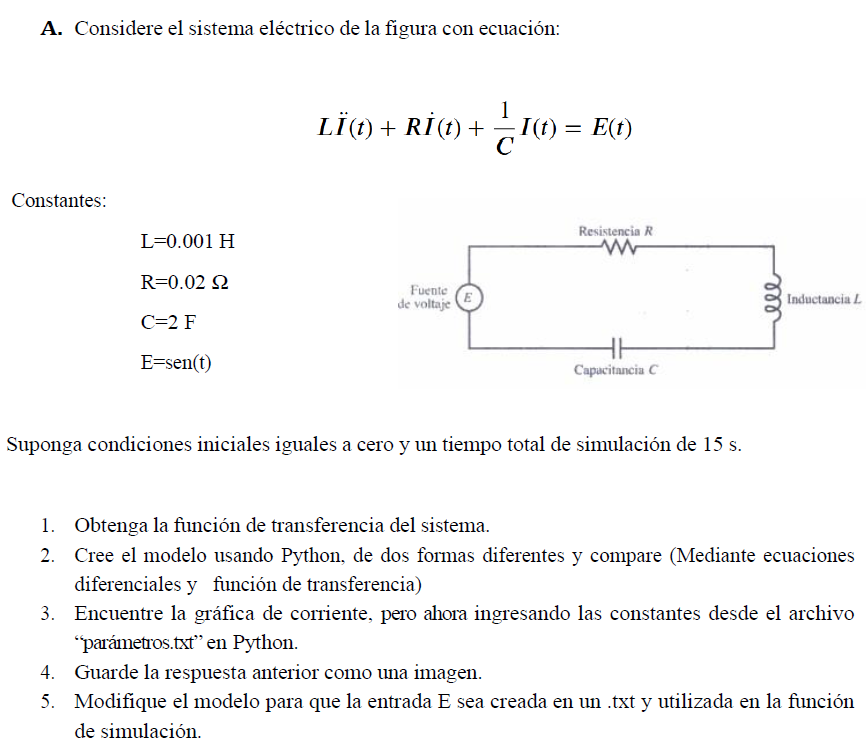

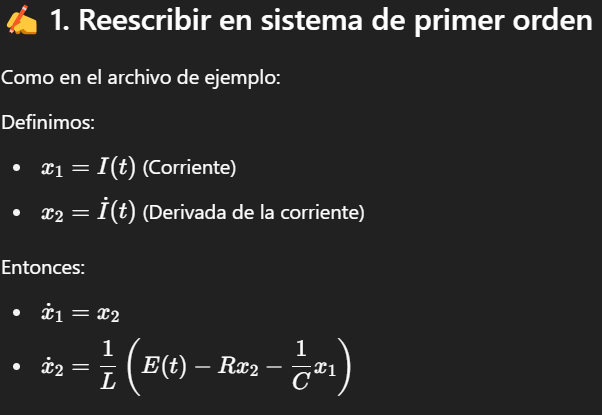

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.signal as signal

# Definición de constantes
L = 0.001
R = 0.02
C = 2

# Función que define las ecuaciones diferenciales
def sys(t, y, L, R, C):
    E = np.sin(t)  # Entrada E(t)
    x1, x2 = y
    dx1_dt = x2
    dx2_dt = (1/L) * (E - R*x2 - (1/C)*x1)
    return [dx1_dt, dx2_dt]

#Realizar la simulación
# Condiciones iniciales
y0 = [0, 0]  # I(0) = 0 A, dI/dt(0) = 0 A/s

# Tiempo de simulación
Tm = 0.01  # paso de tiempo pequeño para mayor resolución
total_time = 15
t_span = (0, total_time)
time = np.arange(0, total_time + Tm, Tm)

# Resolver las ecuaciones diferenciales
sol = solve_ivp(sys, t_span, y0, t_eval=time, args=(L, R, C))

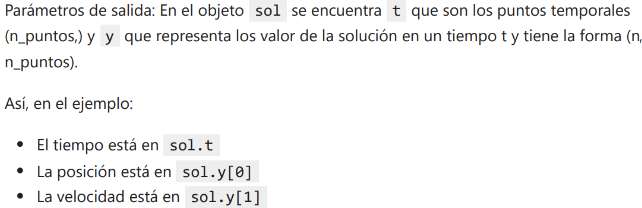

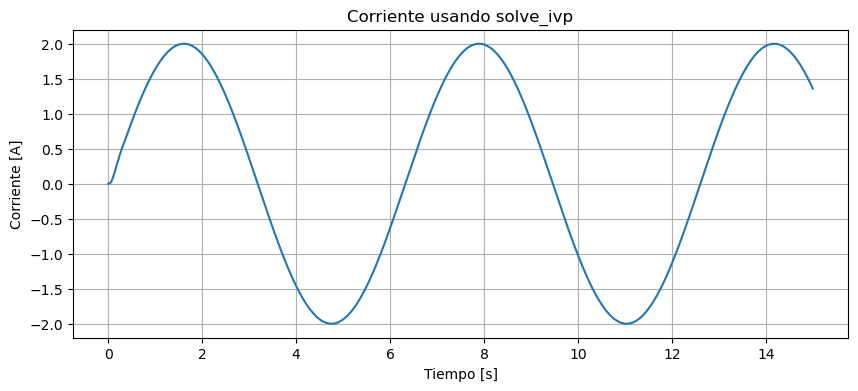

In [5]:
# Graficar corriente
plt.figure(figsize=(10, 4))
plt.plot(sol.t, sol.y[0])
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [A]')
plt.title('Corriente usando solve_ivp')
plt.grid(True)
plt.show()



![Imagen de WhatsApp 2025-04-29 a las 10.33.58_f3fd1074.jpg](<attachment:Imagen de WhatsApp 2025-04-29 a las 10.33.58_f3fd1074.jpg>)
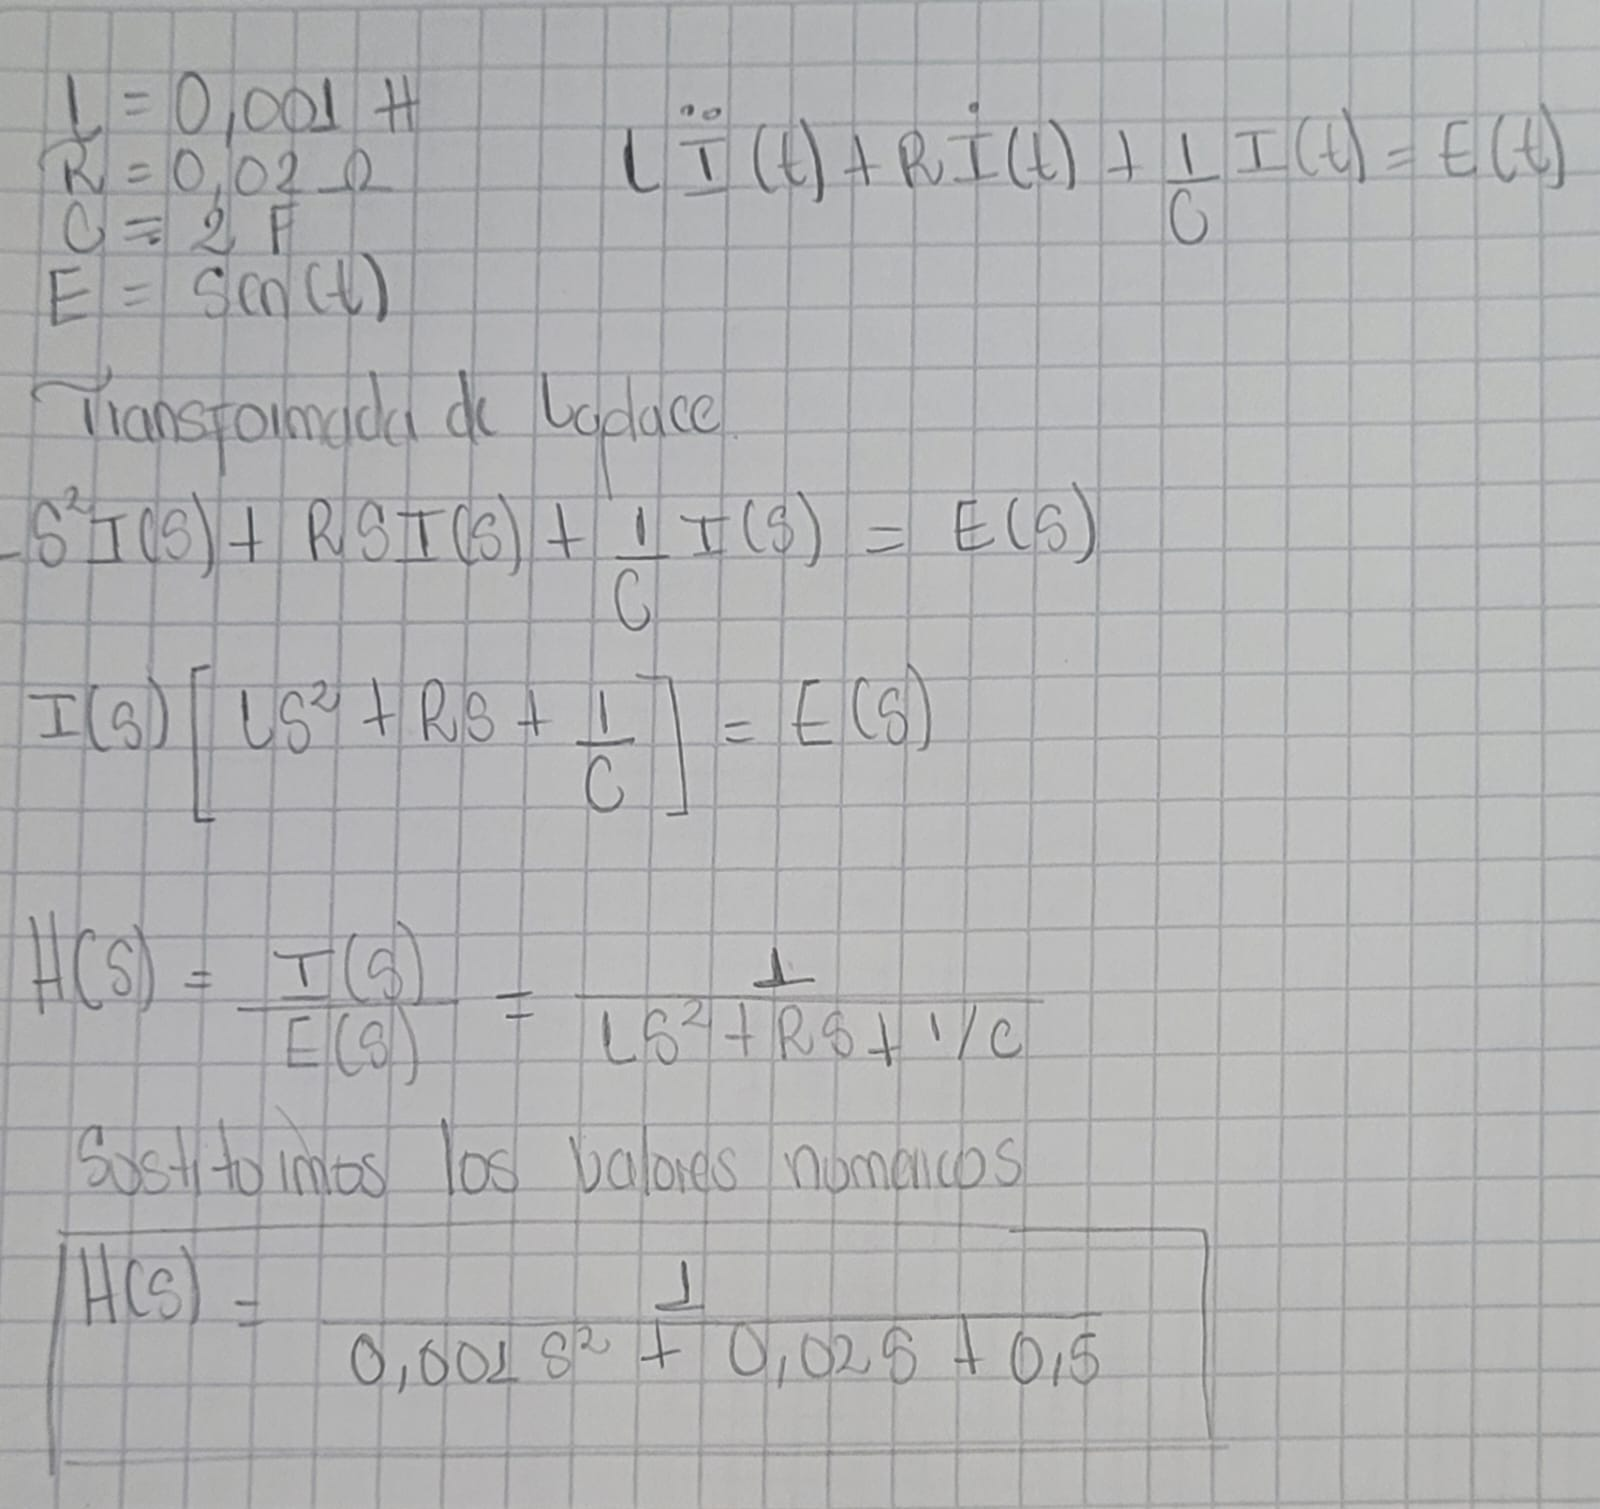

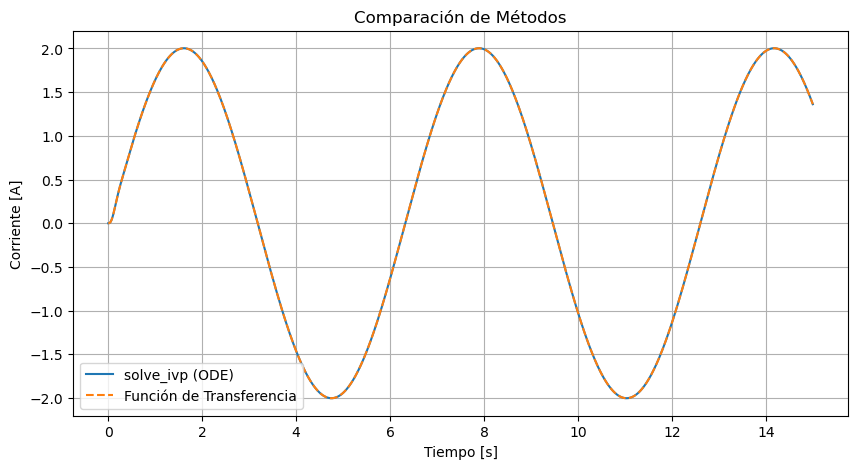

In [8]:
# Coeficientes de la función de transferencia
num = [1]
den = [L, R, 1/C]

# Crear la entrada E(t) nuevamente
E = np.sin(time)

# Crear el sistema
sys = signal.TransferFunction(num, den)

# Simular la respuesta
t_out, y_out, _ = signal.lsim(sys, E, T=time)

plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='solve_ivp (ODE)')
plt.plot(t_out, y_out, '--', label='Función de Transferencia')
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [A]')
plt.title('Comparación de Métodos')
plt.legend()
plt.grid(True)
plt.show()

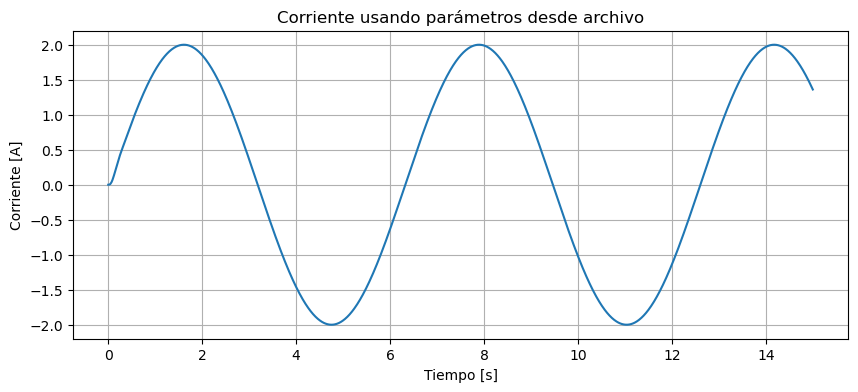

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ------------------------------------
# 1. Leer parametros desde el archivo
# ------------------------------------
parametros = np.loadtxt('parametros.txt')
L = parametros[0]
R = parametros[1]
C = parametros[2]

# ------------------------------------
# 2. Definir el sistema
# ------------------------------------
def rlc_system(t, y, L, R, C):
    E = np.sin(t)
    x1, x2 = y
    dx1_dt = x2
    dx2_dt = (1/L)*(E - R*x2 - (1/C)*x1)
    return [dx1_dt, dx2_dt]

# ------------------------------------
# 3. Simular el sistema
# ------------------------------------
y0 = [0, 0]
Tm = 0.01
total_time = 15
t_span = (0, total_time)
time = np.arange(0, total_time + Tm, Tm)

sol = solve_ivp(rlc_system, t_span, y0, t_eval=time, args=(L, R, C))

# ------------------------------------
# 4. Graficar la corriente
# ------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(sol.t, sol.y[0])
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [A]')
plt.title('Corriente usando parámetros desde archivo')
plt.grid(True)
plt.savefig('corriente.png', dpi=300)  # Guarda la imagen
plt.show()


In [14]:
# Crear un archivo de entrada de prueba (opcional si no lo tienes)
time = np.arange(0, 15.01, 0.01)
entrada = np.sin(time)

data = np.column_stack((time, entrada))
np.savetxt('Entrada.txt', data)

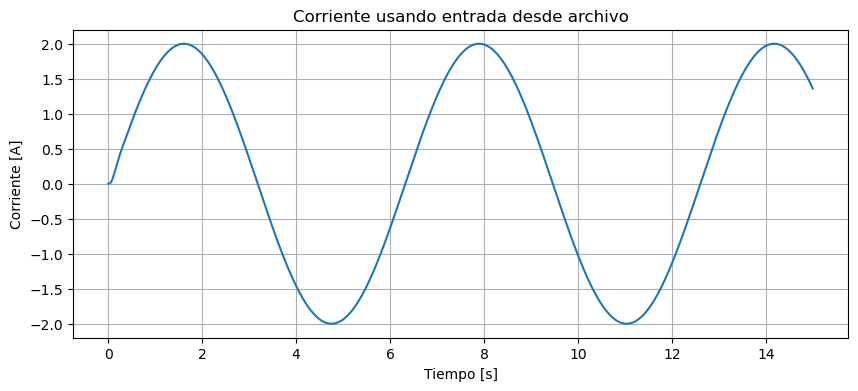

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# ------------------------------------
# 1. Leer parámetros desde el archivo
# ------------------------------------
parametros = np.loadtxt('parametros.txt')
L = parametros[0]
R = parametros[1]
C = parametros[2]

# ------------------------------------
# 2. Leer entrada desde archivo
# ------------------------------------
data = np.loadtxt('Entrada.txt')
t_txt = data[:,0]
E_txt = data[:,1]

E_func = interp1d(t_txt, E_txt, fill_value="extrapolate")

# ------------------------------------
# 3. Definir el sistema
# ------------------------------------
def rlc_system(t, y, L, R, C):
    E_val = E_func(t)
    x1, x2 = y
    dx1_dt = x2
    dx2_dt = (1/L)*(E_val - R*x2 - (1/C)*x1)
    return [dx1_dt, dx2_dt]

# ------------------------------------
# 4. Simular el sistema
# ------------------------------------
y0 = [0, 0]
Tm = 0.01
total_time = 15
t_span = (0, total_time)
time = np.arange(0, total_time + Tm, Tm)

sol = solve_ivp(rlc_system, t_span, y0, t_eval=time, args=(L, R, C))

# ------------------------------------
# 5. Graficar la corriente
# ------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(sol.t, sol.y[0])
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [A]')
plt.title('Corriente usando entrada desde archivo')
plt.grid(True)
plt.savefig('corriente_desde_archivo.png', dpi=300)
plt.show()


b. sistema mecánico:

Reescribir como sistema de primer orden

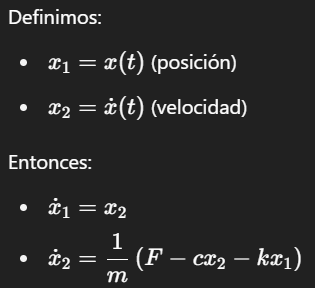

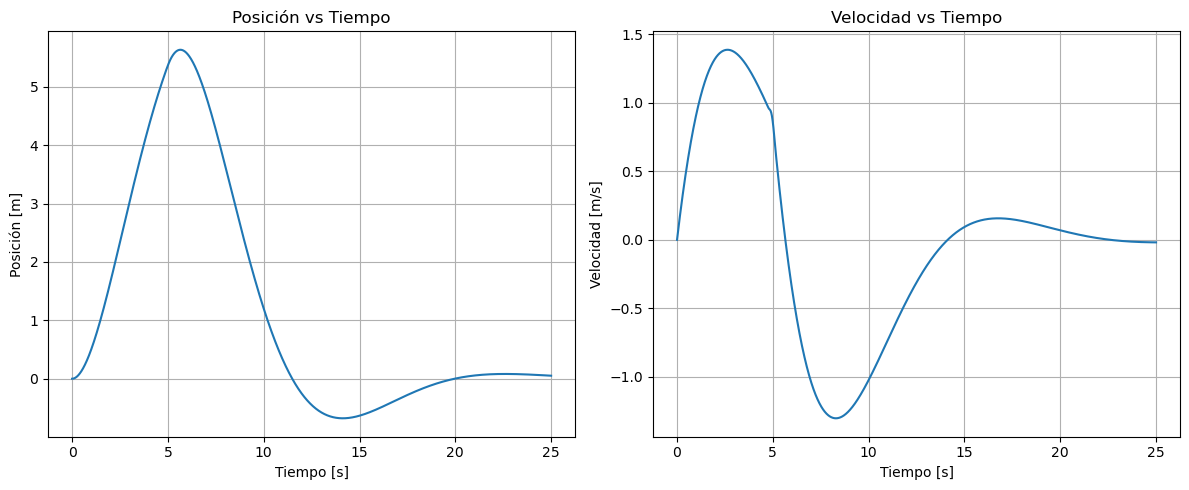

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.signal as signal

# Definimos constantes
m = 1
c = 0.5
k = 0.2

# Función del sistema
def sistema_mecanico(t, y, m, c, k):
    # Fuerza externa tipo escalón (aparece en los primeros 5 segundos)
    F = 1.2 if t <= 5 else 0
    x1, x2 = y
    dx1_dt = x2
    dx2_dt = (1/m)*(F - c*x2 - k*x1)
    return [dx1_dt, dx2_dt]

# Condiciones iniciales
y0 = [0, 0]  # x(0) = 0, dx/dt(0) = 0

# Tiempo de simulación
Tm = 0.01
total_time = 25
t_span = (0, total_time)
time = np.arange(0, total_time + Tm, Tm)

# Resolver
sol = solve_ivp(sistema_mecanico, t_span, y0, t_eval=time, args=(m, c, k))

plt.figure(figsize=(12, 5))

# Posición
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0])
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title('Posición vs Tiempo')
plt.grid(True)

# Velocidad
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1])
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.title('Velocidad vs Tiempo')
plt.grid(True)

plt.tight_layout()
plt.show()


![Imagen de WhatsApp 2025-04-29 a las 11.21.17_b0444c5d.jpg](<attachment:Imagen de WhatsApp 2025-04-29 a las 11.21.17_b0444c5d.jpg>)
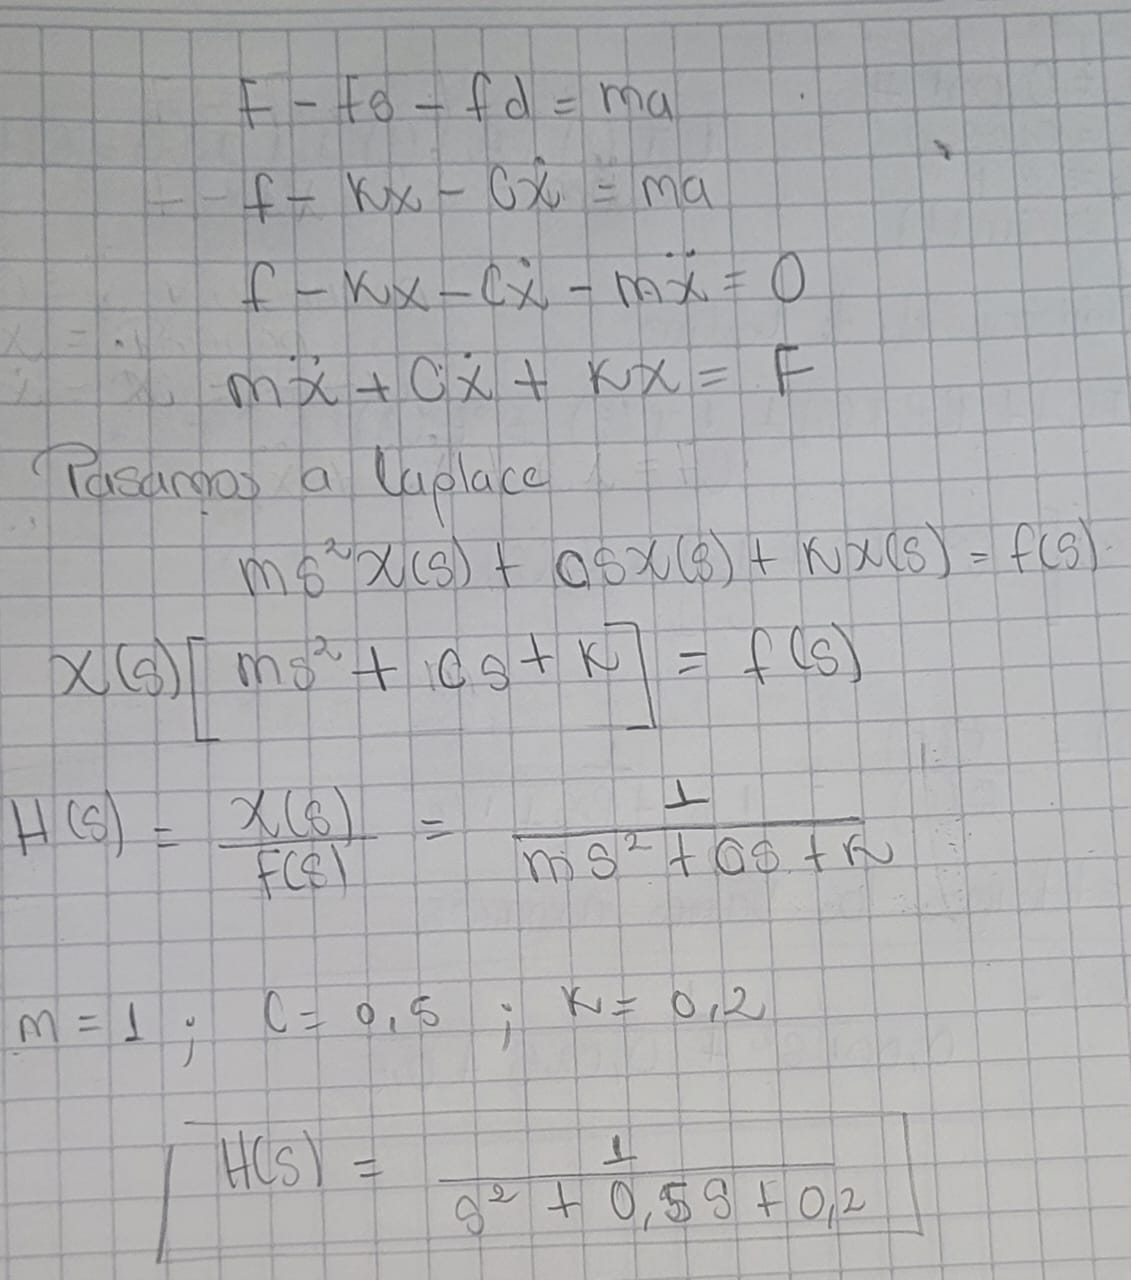

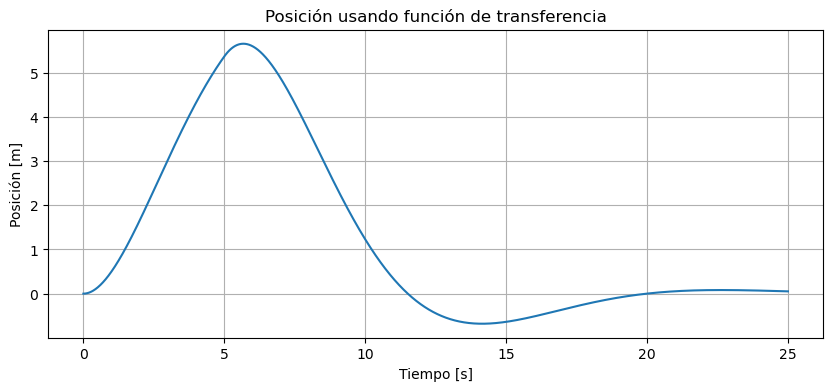

In [19]:
import scipy.signal as signal

# Coeficientes del numerador y denominador
num = [1]
den = [m, c, k]

# Definir el tiempo de simulación
time = np.arange(0, 25.01, 0.01)

# Definir la entrada: Escalón de magnitud 1.2 en los primeros 5 segundos
F = np.where(time <= 5, 1.2, 0)

# Crear el sistema
sistema = signal.TransferFunction(num, den)

# Simular el sistema
t_out, y_out, _ = signal.lsim(sistema, U=F, T=time)

plt.figure(figsize=(10, 4))
plt.plot(t_out, y_out)
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title('Posición usando función de transferencia')
plt.grid(True)
plt.show()


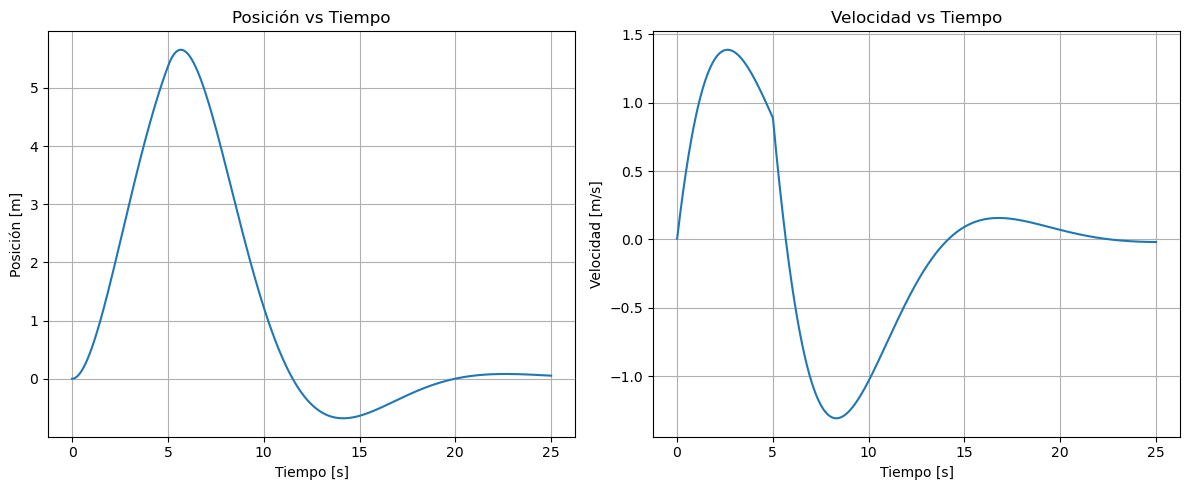

In [20]:
# Calcular velocidad (derivada numérica de la posición)
velocidad = np.gradient(y_out, time)

# Gráfica de posición y velocidad
plt.figure(figsize=(12, 5))

# Posición
plt.subplot(1, 2, 1)
plt.plot(t_out, y_out)
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title('Posición vs Tiempo')
plt.grid(True)

# Velocidad
plt.subplot(1, 2, 2)
plt.plot(t_out, velocidad)
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.title('Velocidad vs Tiempo')
plt.grid(True)

plt.tight_layout()
plt.show()


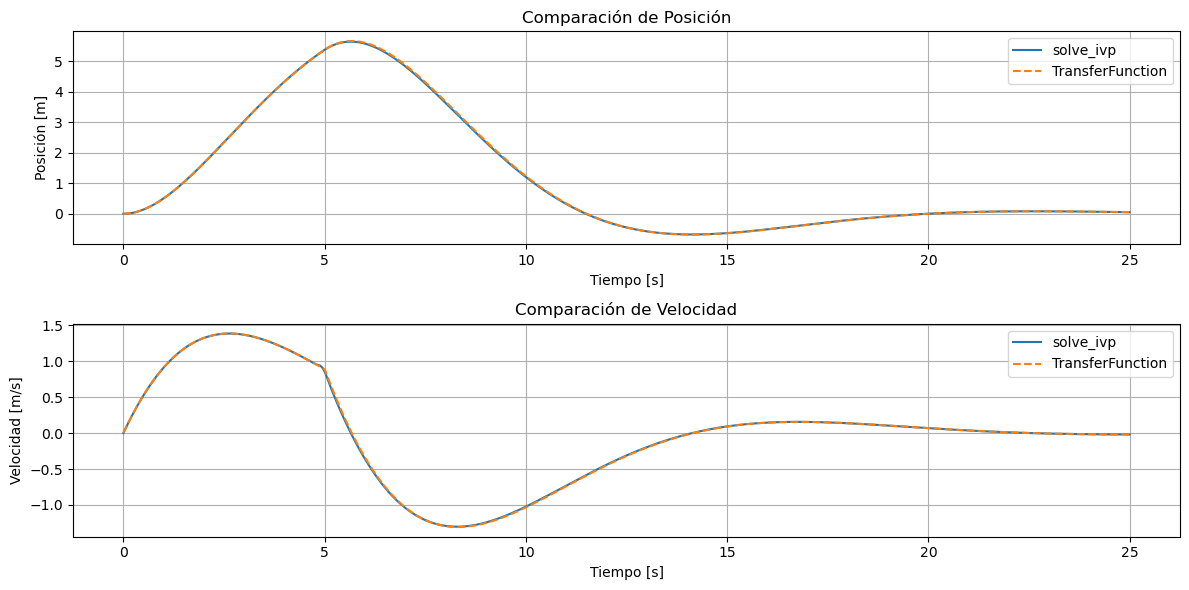

In [21]:
# Calcular velocidad numérica para el segundo método
velocidad_transfer = np.gradient(y_out, time)

# Gráficas comparativas
plt.figure(figsize=(12, 6))

# Comparar posiciones
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='solve_ivp')
plt.plot(t_out, y_out, '--', label='TransferFunction')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title('Comparación de Posición')
plt.legend()
plt.grid(True)

# Comparar velocidades
plt.subplot(2, 1, 2)
plt.plot(sol.t, sol.y[1], label='solve_ivp')
plt.plot(t_out, velocidad_transfer, '--', label='TransferFunction')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.title('Comparación de Velocidad')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
